In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
sns.set_context('poster')
sns.set_palette('colorblind')

random_seed = 2021

### First, let's simulate the data we're going to fit!

In [2]:
m_true = 5
c_true = 10

x = np.linspace(0, 10, 100)
y = m_true * x + c_true
yerr = 6.

np.random.seed(random_seed)
y += np.random.randn(len(y))*yerr

Text(0, 0.5, 'y')

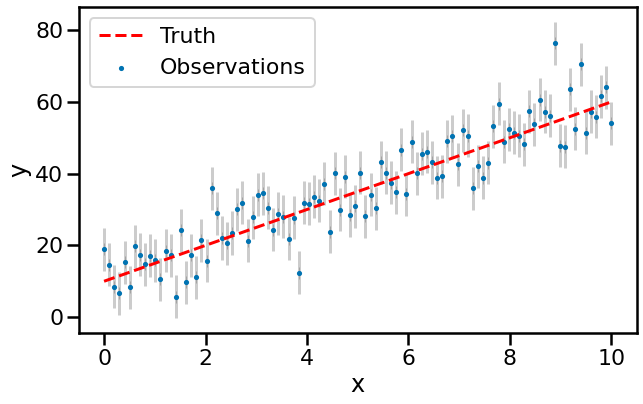

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, zorder=1, s=10, label='Observations')
ax.errorbar(x, y, yerr=yerr, alpha=.2, c='k', zorder=0, fmt='|')
ax.plot(x, m_true * x + c_true, ls='--', c='r', lw=3, label='Truth')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

Now, let's set up a PyMC3 script to model this line! We want to measure the parameters $m$ and $c$ that determine the slope and intercept of the line.

In [4]:
model = pm.Model()

with model:
    # Define the parameters and give them priors
    m = pm.Uniform('m', lower = 1, upper = 10, testval = 5.)
    c = pm.Normal('c', mu = 10, sigma = 10, testval = 5.)
    
    likelihood = pm.Normal('ll', mu = m * x + c, sigma = yerr, observed = y)

What we've set up here is a simple Bayesian model with two priors and a likelihood function. The priors are set up that $m$ has a uniform probability to be between 1 and 10. The intercept $c$ has a prior that is a normal distribution centered on 10 with a spread of 10 (which I'm guessing based on how the data look). The `testval`s are first guesses you can make based on the data, which improve the efficiency of the sampling.

The `likelihood` line determines how the parameters (which have been defined by your priors) are evaluated against the data! In this case we use a normal distribution, with a mean that is set as your model, and standard deviation equal to the uncertainty on your observations. The `observed = y` argument states that this line will evaluate your model against the data.

We now sample the model as follows:

In [5]:
with model:
    trace = pm.sample(random_seed = random_seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, m]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
The acceptance probability does not match the target. It is 0.8920494606097824, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9092131868528961, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8863681119679784, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


And our model has sampled! PyMC3 has some built in methods you can use to evaluate your fit.

In [6]:
print(pm.summary(trace))

/Users/Anaconda/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
c  10.582  1.247   8.184   12.909      0.042    0.030     890.0   875.0   
m   5.040  0.212   4.652    5.435      0.007    0.005     902.0   902.0   

   ess_bulk  ess_tail  r_hat  
c     893.0    1007.0   1.01  
m     906.0     963.0   1.01  


This summary shows that the `r_hat` parameter is equal or close to 1, which indicates a good fit.

/Users/Anaconda/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


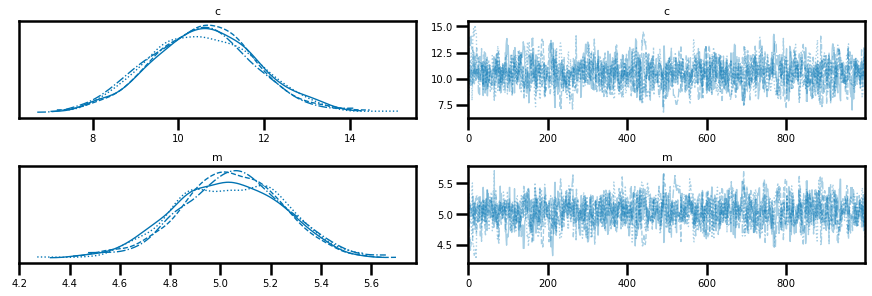

In [7]:
pm.traceplot(trace);

And this `traceplot` shows that the sampled posterior distributions look like nice normal distributions encompassing the true answer. Good!




Finally, we can look at the results using a `corner` plot, which is a very popular tool for studying the output of MCMC analyses. Essentially, it plots the samples drawn from the model, and so shows the correlations between the different parameters effecitvely.

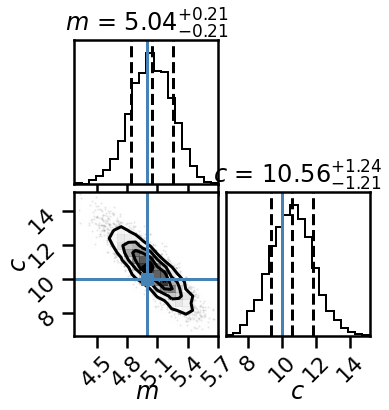

In [8]:
import corner

chain = np.array([trace['m'], trace['c']])
corner.corner(chain.T, labels=[r'$m$',r'$c$'], show_titles=True, 
              quantiles=[0.16, 0.5, 0.84], truths=[m_true, c_true])
plt.show()

You can see that the normal $68\%$ confidence interval (indicated by the dashed lines) contains the "truth" values--- our model has done a good job!

Finally, we can plot the draws of our model over the data to see how the data have informed our model.

In [14]:
quantiles[0]

array([ 9.34699351,  9.86963504, 10.39834625, 10.92117104, 11.45035253,
       11.97684537, 12.50213071, 13.02121996, 13.54818482, 14.07381255,
       14.59556877, 15.12653877, 15.6485669 , 16.17440329, 16.70554409,
       17.22985022, 17.76184571, 18.28578264, 18.8144536 , 19.33665224,
       19.85573953, 20.38024606, 20.90541448, 21.42811582, 21.95325613,
       22.47447343, 23.00180618, 23.52502199, 24.04816644, 24.5694735 ,
       25.08608173, 25.60684297, 26.13357602, 26.64831594, 27.16998454,
       27.68578759, 28.20972976, 28.72617509, 29.24512983, 29.76240496,
       30.28153318, 30.80201243, 31.32059308, 31.83910918, 32.3549831 ,
       32.87474076, 33.3871279 , 33.89781178, 34.40829358, 34.92103181,
       35.43133256, 35.94228059, 36.44652172, 36.94802539, 37.45629962,
       37.96260368, 38.46214909, 38.96646917, 39.46896908, 39.96442053,
       40.47253159, 40.97564126, 41.47127829, 41.97136386, 42.47474861,
       42.97788589, 43.48215956, 43.98175577, 44.48030094, 44.97

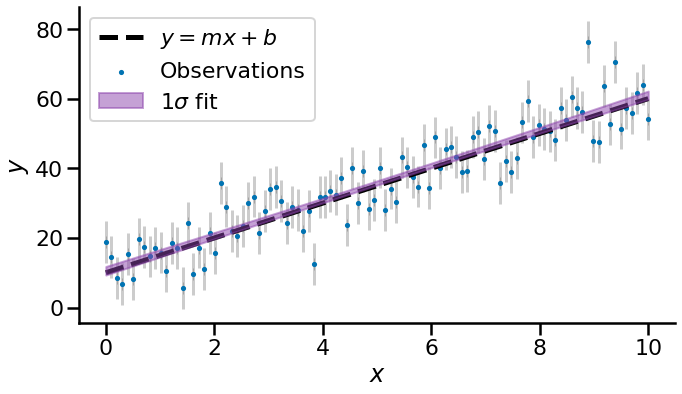

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x, y, zorder=1, s=10, label='Observations')
ax.errorbar(x, y, yerr=yerr, alpha=.2, c='k', zorder=0, fmt='|')

linrange = np.linspace(0, 10, 100)
A = np.vander(linrange, 2)
lines = np.dot(chain.T, A.T)
quantiles = np.percentile(lines, [16, 84], axis=0)
plt.fill_between(linrange, quantiles[0], quantiles[1], color="#8d44ad", alpha=0.5, zorder=10, label=r'$1\sigma$ fit')
ax.plot(linrange, m_true*linrange + c_true, c='k', zorder=1, alpha=1., ls='--', lw=5, label=r'$y = mx + b$')


ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend(loc='upper left')
sns.despine()
fig.tight_layout()
plt.show()